In [1]:
import numpy as np
import pandas as pd

In [2]:
url = "https://raw.githubusercontent.com/AyushVaZe67/Deep-Learning/main/Learning/Social_Network_Ads.csv"
df = pd.read_csv(url)

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df = df.iloc[:,2:]

In [5]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

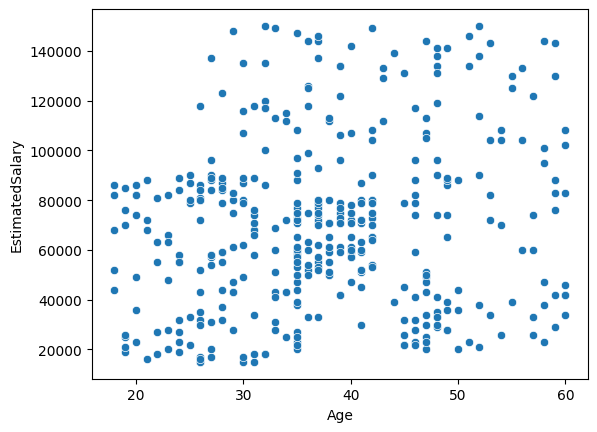

In [6]:
import seaborn as sns
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1])

In [7]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [9]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [10]:
model = Sequential()

In [11]:
model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
history = model.fit(X_train,y_train,validation_data=[X_test,y_test],epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.5795 - loss: 218.5759 - val_accuracy: 0.6000 - val_loss: 67.4355
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6077 - loss: 76.6692 - val_accuracy: 0.6000 - val_loss: 161.8585
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5583 - loss: 95.7265 - val_accuracy: 0.4000 - val_loss: 38.4809
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4634 - loss: 48.8073 - val_accuracy: 0.6000 - val_loss: 69.2936
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6213 - loss: 84.6360 - val_accuracy: 0.6000 - val_loss: 15.9975
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4947 - loss: 54.3146 - val_accuracy: 0.4000 - val_loss: 129.0715
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3815 - loss: 171.5087 - val_accuracy: 0.6000 - val_loss: 30.7012
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4862 - loss: 72.4812 

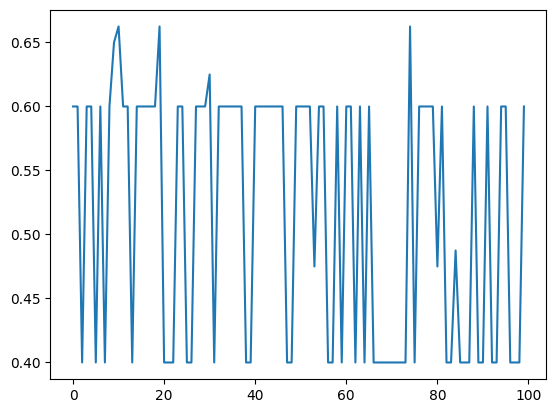

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

In [26]:
from sklearn.preprocessing import StandardScaler

# Assuming X_train and X_test are your original datasets
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
X_train_scaled

array([[ 0.88928823, -0.65924556],
       [-0.17254846,  0.87392651],
       [-1.04132394, -0.36440478],
       [ 0.98581884,  0.6085698 ],
       [-0.94479333,  0.57908572],
       [ 0.40663519,  0.01888824],
       [ 0.98581884,  2.11225779],
       [ 0.31010458, -0.30543662],
       [ 1.7580637 , -0.27595254],
       [-0.17254846,  2.20071003],
       [ 1.7580637 ,  1.0213469 ],
       [-1.33091576, -1.48479975],
       [ 2.04765553,  0.54960165],
       [ 1.27541066,  1.90586924],
       [-1.13785454,  0.31372902],
       [-0.36560968, -0.77718187],
       [-1.71703819,  0.49063349],
       [-0.5586709 , -1.51428383],
       [ 0.31010458, -0.71821372],
       [ 0.02051275, -0.57079333],
       [ 0.02051275,  0.04837232],
       [-0.07601785, -0.51182517],
       [-0.6552015 , -1.51428383],
       [ 0.02051275,  0.31372902],
       [ 0.31010458,  0.07785639],
       [-0.46214029, -1.13099081],
       [-0.75173211, -1.54376791],
       [-0.26907907, -0.65924556],
       [-1.13785454,

<Axes: >

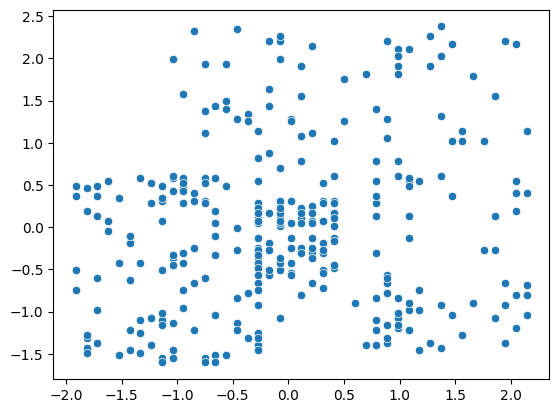

In [28]:
import seaborn as sns

sns.scatterplot(x=X_train_scaled[:, 0], y=X_train_scaled[:, 1])

In [29]:
model1 = Sequential()
model1.add(Dense(128,activation='relu',input_dim=2))
model1.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model1.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [31]:
history = model1.fit(X_train_scaled,y_train,validation_data=[X_test_scaled,y_test],epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.4231 - loss: 0.7059 - val_accuracy: 0.6875 - val_loss: 0.6618
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7458 - loss: 0.6488 - val_accuracy: 0.8000 - val_loss: 0.6023
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8445 - loss: 0.5934 - val_accuracy: 0.8000 - val_loss: 0.5517
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7924 - loss: 0.5543 - val_accuracy: 0.7875 - val_loss: 0.5090
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8303 - loss: 0.5083 - val_accuracy: 0.7875 - val_loss: 0.4711
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8286 - loss: 0.4840 - val_accuracy: 0.8000 - val_loss: 0.4402
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8632 - loss: 0.4364 - val_accuracy: 0.8250 - val_loss: 0.4140
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8934 - loss: 0.4217 - val_accuracy: 0.8250 

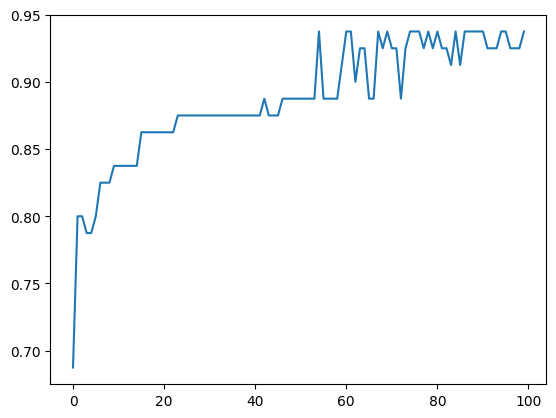

In [32]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])